In [2]:

#print('importing commonly used modules from:\n~/.ipython/profile_default/startup/00-startup-modules.py')

import datetime
import os
import time
import sys
import importlib
import glob

## do NOT import pylab - instead import numpy and pyplot

# -- -- -- -- -- -- -- -- -- -- -- -- -- --
import numpy as np
from numpy import pi
import numpy.random as nprnd
import numpy.linalg as npla
import xarray as xr

# -- -- -- -- -- -- -- -- -- -- -- -- -- --
import scipy as scp
import scipy.integrate as scpint
import scipy.stats as scpst
import scipy.io as scpio

# -- -- -- -- -- -- -- -- -- -- -- -- -- --
import matplotlib
# matplotlib.use('TkAgg')    # works for from command line but NOT from notebook
# matplotlib.use('GTKAgg')   # requires pygtk which is not installed
# matplotlib.use('Qt4Agg')
## check list of all available backends:
# matplotlib.rcsetup.interactive_bk
# matplotlib.rcsetup.non_interactive_bk
# matplotlib.rcsetup.all_backends


# -- -- -- -- -- -- -- -- -- -- -- -- -- --
import matplotlib.pyplot as plt
plt.ion()
from mpl_toolkits.mplot3d import Axes3D
## see http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
## basic commands:
#-   fig=plt.figure()
#-   ax=Axes3D(fig)
#-   ax.plot(X[:,0],X[:,1],X[:,2])

#### instead of LaTeX, just use 'mathtex'
# plt.rcParams['text.usetex'] = True ### no need
# https://matplotlib.org/stable/tutorials/text/mathtext.html


In [3]:
def l63rhs(xin, tin, pars):
  frhs = xin*0.0
  beta, sigma, rho = pars
  x, y, z = xin
  frhs[0] = sigma * (y - x)
  frhs[1] = x * (rho - z) - y
  frhs[2] = x * y - beta * z
  return frhs

def l63rhs_ode(tin, xin, pars):
  return l63rhs(xin, tin, pars)

def l63rhs_df(xin,tin,pars):
  df = np.zeros((3,3))
  beta, sigma, rho = pars
  x, y, z = xin
  df[0,0] = -sigma; df[0,1] = sigma
  df[1,0] = rho - z; df[1,1] = -1.0; df[1,2] = -x
  df[2,0] = y; df[2,1] = x; df[2,2] = -beta
  return df

def l63rhslin(zin, tin, pars):
  '''
  Here zin must be 12 dimensionsal: xin, followed by rows of mlin
  '''
  beta, sigma, rho = pars
  ndim = 3
  xin = zin[:ndim]
  mlin = np.reshape(zin[ndim:],(ndim,ndim),'F')

  df = l63rhs_df(xin, tin, pars)
  xin = l63rhs(xin, tin, pars)
  mlin = np.dot(df, mlin)

  frhs = np.concatenate((xin, np.reshape(mlin,ndim**2,'F')))
  return frhs

def l63rhslin_ode(tin, xin, pars):
  return l63rhslin(xin, tin, pars)

def l63rhslinvec(zin, tin, pars):
  '''
  Here zin must be 6 dimensionsal: xin, followed by zlin
  '''
  beta, sigma, rho = pars
  ndim = 3
  xin = zin[:ndim]
  zlin = zin[ndim:]

  df = l63rhs_df(xin, tin, pars)
  xin = l63rhs(xin, tin, pars)
  zlin = np.dot(df, zlin)

  frhs = np.concatenate((xin, zlin))
  return frhs

def l63rhslinvec_ode(tin, xin, pars):
  return l63rhslinvec(xin, tin, pars)




In [11]:
beta = 8.0/3;  sigma = 10.0;  rho = 28.0
pars = (beta,sigma,rho)

In [30]:
ndim = 3

xrand = np.random.rand(ndim)
ttrans = np.linspace(0,30,1000)
xtrans = scp.integrate.odeint(l63rhs, xrand, ttrans, (pars,))

t = np.linspace(0,20,10000)
xattr = xtrans[-1,:]

xinit1 = xattr
xtraj1 = scp.integrate.odeint(l63rhs, xinit1, t, (pars,))

xinit2 = xattr + np.random.rand(ndim)*12.0e-8
xtraj2 = scp.integrate.odeint(l63rhs, xinit2, t, (pars,))

trajdiff = np.array([np.linalg.norm(v) for v in xtraj1-xtraj2])


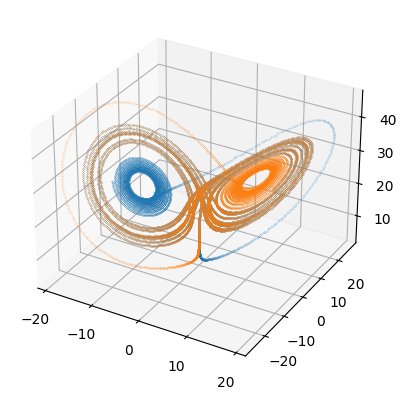

In [31]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xtraj1[:,0], xtraj1[:,1], xtraj1[:,2], '.', ms=0.3)
ax.plot(xtraj2[:,0], xtraj2[:,1], xtraj2[:,2], '.', ms=0.3)


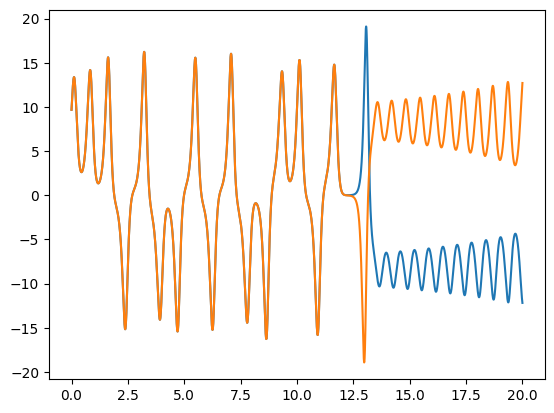

In [33]:
plt.plot(t, xtraj1[:,0])
plt.plot(t, xtraj2[:,0])

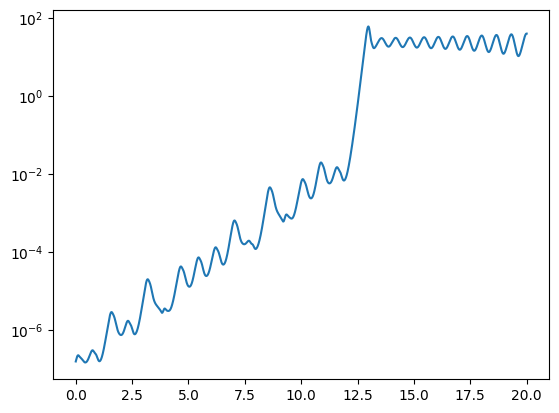

In [34]:
plt.plot(t, trajdiff)
plt.yscale("log")